In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import math

In [3]:
dataset = pd.read_csv("./datasets/MSFT.csv", index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [4]:
training_set = dataset['2021-01-01':'2021-03-12'].iloc[:,4:5].values

In [5]:
training_set

array([[217.18977356],
       [217.39929199],
       [211.76226807],
       [217.78839111],
       [219.11534119],
       [216.99023438],
       [214.43611145],
       [215.84288025],
       [212.53051758],
       [212.16134644],
       [215.94264221],
       [223.82449341],
       [224.45304871],
       [225.43078613],
       [229.00256348],
       [231.79614258],
       [232.36482239],
       [238.38096619],
       [231.42698669],
       [239.0993042 ],
       [238.95962524],
       [242.44161987],
       [241.45388794],
       [241.64344788],
       [241.9128418 ],
       [243.20985413],
       [242.26203918],
       [243.92819214],
       [244.42704773],
       [243.13999939],
       [244.19999695],
       [243.78999329],
       [240.97000122],
       [234.50999451],
       [233.27000427],
       [234.55000305],
       [228.99000549],
       [232.38000488],
       [236.94000244],
       [233.86999512],
       [227.55999756],
       [226.72999573],
       [231.6000061 ],
       [227

In [6]:
test_set = dataset['2021-03-15':].iloc[:,4:5].values
test_set

array([[234.80999756],
       [237.71000671],
       [237.03999329],
       [230.72000122],
       [230.3500061 ],
       [235.99000549],
       [237.58000183],
       [235.46000671],
       [232.33999634],
       [236.47999573],
       [235.24000549],
       [231.8500061 ],
       [235.77000427],
       [242.3500061 ],
       [249.07000732],
       [247.86000061],
       [249.8999939 ],
       [253.25      ],
       [255.8500061 ],
       [255.91000366],
       [258.48999023],
       [255.58999634],
       [259.5       ],
       [260.73999023],
       [258.73999023],
       [258.26000977],
       [260.57998657],
       [257.17001343],
       [261.1499939 ],
       [261.54998779],
       [261.97000122],
       [254.55999756],
       [252.50999451],
       [252.17999268],
       [251.86000061]])

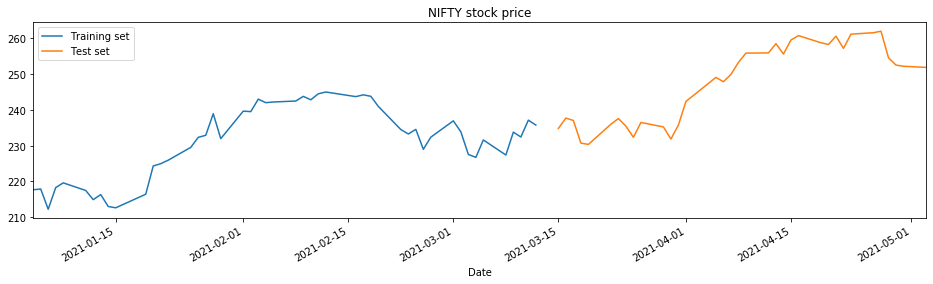

In [7]:
dataset["Close"]['2021-01-01':'2021-03-12'].plot(figsize=(25,10),legend=True)
dataset["Close"]['2021-03-15':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title("NIFTY"+' stock price')
plt.show()

### MinMax Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []

previous = 30

for i in range(previous,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-previous:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(18, 30, 1)

### The GRU Architecture

In [12]:
from keras.models import Sequential
from keras.layers import GRU
#Dense, LSTM, Dropout, Bidirectional

In [13]:
from keras.layers import Dropout
from keras.layers import Dense

In [14]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.4536
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.3408
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2164
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.1203
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0564
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0337
Epoch 7/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0402
Epoch 8/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1148
Epoch 9/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0934
Epoch 10/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0782
Epoch 11/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0431
Epoch 12/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0315
Epoch 13/100
1/1 [==============================] -

In [15]:
# testing the model
dataset_total = pd.concat((dataset["Close"][:'2021-02'],dataset["Close"]['2021-03':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - previous:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.fit_transform(inputs)
len(inputs)

65

In [16]:
dataset_total=dataset_total[len(dataset_total)-len(test_set) - previous:]
dataset_total=pd.DataFrame(dataset_total)
dataset_total[:5]

,Close
Date,
2021-01-29,231.960007
2021-02-01,239.649994
2021-02-02,239.509995
2021-02-03,243.000000
2021-02-04,242.009995


In [17]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(previous,len(inputs)):
    X_test.append(inputs[i-previous:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

[251.86000061] [253.57193]


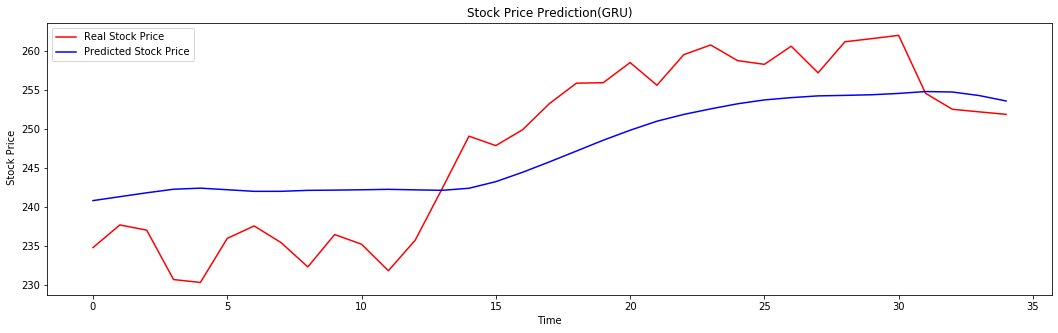

In [18]:
#Checking 
print(test_set[-1],predicted_stock_price[-1])

# Visualizing the results
plt.figure(figsize=(18,5))
plt.plot(test_set[:], color='red',label='Real Stock Price')
plt.plot(predicted_stock_price[:], color='blue',label='Predicted Stock Price')
plt.title("Stock Price Prediction(GRU)")
plt.xlabel('Time')
plt.ylabel(" Stock Price")
plt.legend()
plt.show();

In [19]:
# Evaluating our model
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 6.656900142715531.


In [24]:
rmse1 = math.sqrt(mean_squared_error(training_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse1))

ValueError: Found input variables with inconsistent numbers of samples: [48, 35]

35
35
Previous Day Pred [253.70668]
Next day Pred [254.00067]
Prediction Diffrence [0.2939911]
Actual prev Day Price [258.26000977]
Actual next day price [260.57998657]
Actual Diffrence [2.31997681]


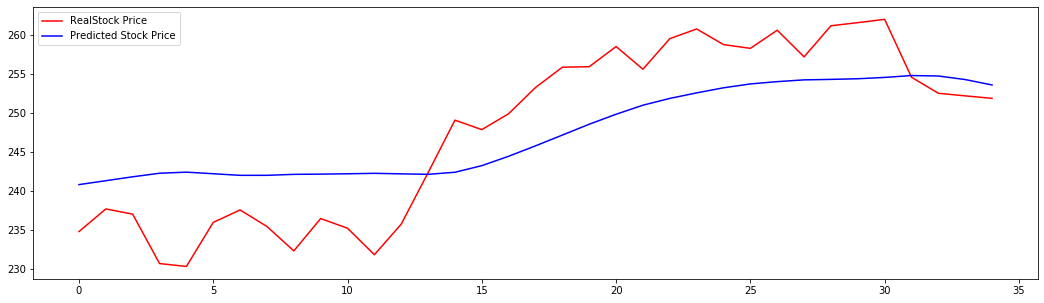

In [20]:
print(len(test_set))
print(len(predicted_stock_price))

#Prediction Diffrence from prev day prediction to current day prediction 
prevday_pred = predicted_stock_price[25]
currentday_pred= predicted_stock_price[26]

diff =  currentday_pred - prevday_pred

#Actual Diffrence from prev day Actual price  to current day Actual price

_prev = test_set[25]
_current = test_set[26]

_diff = _current - _prev

#printing the results

print("Previous Day Pred",prevday_pred)
print("Next day Pred",currentday_pred)
print("Prediction Diffrence",diff)

print("Actual prev Day Price",_prev)
print("Actual next day price",_current)
print("Actual Diffrence",_diff)

#plt/between original price and prediction price 
plt.figure(figsize=(18,5))
plt.plot(test_set[-190:], color='red',label='RealStock Price')
plt.plot(predicted_stock_price[-189:], color='blue',label='Predicted Stock Price')
plt.legend()
plt.show()

In [21]:
results=dataset_total.tail(35)
results["Predicted_Price"]=predicted_stock_price
results.columns=["Actaul Price","Predicted_Price"]
results["%_Change"]=results.Predicted_Price.pct_change(axis=0)
results["Class"]=np.where(results["Predicted_Price"].shift(-1)>results["Predicted_Price"],"up","Down")
results.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

,Actaul Price,Predicted_Price,%_Change,Class
Date,,,,
2021-04-27,261.970001,254.538559,0.000665,up
2021-04-28,254.559998,254.779175,0.000945,Down
2021-04-29,252.509995,254.719894,-0.000233,Down
2021-04-30,252.179993,254.266006,-0.001782,Down
2021-05-03,251.860001,253.571930,-0.002730,Down


In [26]:
from sklearn.metrics import r2_score
r2_score(predicted_stock_price , test_set)

-0.49919069446754305